# Random Forest 이용한 행동 예측

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import pandas as pd

features_path = ('/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/human_activity_features.txt')
X_train_path = ('/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/human_activity_X_train.txt')
X_test_path = ('/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/human_activity_X_test.txt')
y_train_path = ('/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/human_activity_y_train.txt')
y_test_path = ('/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/human_activity_y_test.txt')

# "\s+" 한개 이상의 공백으로 나뉘어져있음
# 첫번째줄(칸이름)이 없는경우 header = None
feature_name_df = pd.read_csv(
                            features_path, 
                            sep="\s+",
                            header = None,
                            names = ["column_index", "column_name"]
                            )

X_train= pd.read_csv(
                            X_train_path
                           , header=None
                           , sep="\s+")
X_test= pd.read_csv(
                        X_test_path
                      , header=None
                      , sep="\s+" )

y_train= pd.read_csv( 
                       y_train_path,
                        sep="\s+",
                        header = None,
                        names = ["action"] )

y_test= pd.read_csv(    y_test_path,
                        sep="\s+",
                        header = None,
                        names = ["action"] )

image.png

In [ ]:
# 모든 줄의 1번째 칸 조회
feature_name_df.iloc[ : , 1 ]

# 시리즈가 아니라  numpy 배열 (리스트) 변환
feature_name_df.iloc[ : , 1 ].values
# df에 피처명을 컬럼으로 부여하기 위해 numpy() 배영을 리스트 객체로 다시 변환
feature_name = feature_name_df.iloc[ : , 1 ].values.tolist()
feature_name

# 컬럼명 (칸) 이름 추가
X_train.columns = feature_name
X_train
X_test.columns = feature_name
X_test


tBodyAcc-mean()-X  ...  angle(Z,gravityMean)
0              0.257178  ...             -0.057978
1              0.286027  ...             -0.083898
2              0.275485  ...             -0.079346
3              0.270298  ...             -0.077108
4              0.274833  ...             -0.073857
...                 ...  ...                   ...
2942           0.310155  ...              0.184784
2943           0.363385  ...              0.182412
2944           0.349966  ...              0.181184
2945           0.237594  ...              0.187563
2946           0.153627  ...              0.188103

[2947 rows x 561 columns]

In [ ]:
import numpy as np

# null값 확인해보기 예시
df = pd.DataFrame({
    "A":[100,200, np.nan, 1000, np.nan],
    "B":[1, 10, 7, 11, 5] 
})

# 셀에 결측치가 있는지 확인
# False = 결측치 아님
# True = 결측치
# isnull -> nan값이 True 리턴 , True 값은 1 
df.isnull()

# 결측치 값 합은?
df.isnull().sum()
X_train.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroMean,gravityMean)        0
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Length: 561, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Decision Tree 100개를 만들 객체
# 빈 분류기 생성
RandomForestClassifier()
rf_clf = RandomForestClassifier()

# Decision Tree 100개 생성
# 빈 분류기 훈련
rf_clf.fit(X_train,y_train)

# 예측 값 (만든 Decision Tree X_test)
# 분류기로 예측 해보기
pred = rf_clf.predict(X_test)

# 예측값 출력
print(pred)

# 실제정답 출력
print(y_test)


# 예측값이 진짜 값과 비교하여 맞는지 비율 조회
# 정확도 측정
# 진짜값이랑 예측값이 얼마나 일치하는가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도 : {}'. format(accuracy))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


[5 5 5 ... 2 2 2]
      action
0          5
1          5
2          5
3          5
4          5
...      ...
2942       2
2943       2
2944       2
2945       2
2946       2

[2947 rows x 1 columns]
랜덤 포레스트 정확도 : 0.9300984051577876


In [ ]:
# X_test.iloc[100:101, : ]

# 561개의 난수 생성 
# np.random.randn : 표준 정규 분포 확률에서 실수표본
# 표준 정규 분포 확률에서 실수표본 - >  평균 0 표준편차 1 확률에서 실수들
# np.random.randn(561)  : 표준 정규 분포를 갖는 임의의 실수 561개
new_sensor_data = np.random.randn(561)
new_sensor_data

# new_sensor_data 데이터를 넣을 임의의 데이터프레임 생성
df_new_sensor = pd.DataFrame(columns=feature_name)

df_new_sensor.loc[0] = new_sensor_data.tolist()
df_new_sensor

# 예측
rf_clf.predict(df_new_sensor)

array([2])

# Random Forest 성능 향상

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators":[100], # 트리 개수 100개
    "max_depth":[6, 8, 10, 12], # 최대 트리의 깊이 6, 8,10 ,12
    "min_samples_leaf":[8, 12, 18], # 최소 트리잎의 개수
    "min_samples_split":[8,16, 20] # 전체 데이터 로우 중에서 
                                   # 최소 몇개의 데이터를 이용해서 트리를 만들거냐
}

# 10개로 쪼개어서 테스트
rf_clf = RandomForestClassifier(n_jobs=10)

# GridSearchCV 객체를 이용해서 RandomForestClassifier 객체의 최적의 파라메터 찾음
# GridSearchCV : 최적의 파라메터를 찾을 RandomForestClassifier 객체
# param_grid = 파라메터 옵션에 저장된 객체
# n_jobs=10 : 동시에 10개씩 테스트
grid_cv = GridSearchCV(rf_clf,param_grid=params, n_jobs=10)

In [ ]:
# 가끔 경고창뜨는거 그냥 무시
warnings.filterwarnings('ignore')

# 설정된 파라메터의 모든 경우 수의 정확도를 훈련하여 가장 정확도가 놓은 파라메터를 찾음
grid_cv.fit(X_train, y_train)

# 최적의 파라미터
grid_cv.best_params_
print('최적의 하이퍼 파라메터' , grid_cv.best_params_)

# 정확도
grid_cv.best_score_
print('최고 예측 정확도 : {0: .4f}' .format(grid_cv.best_score_))

최적의 하이퍼 파라메터 {'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 :  0.9259


image.png

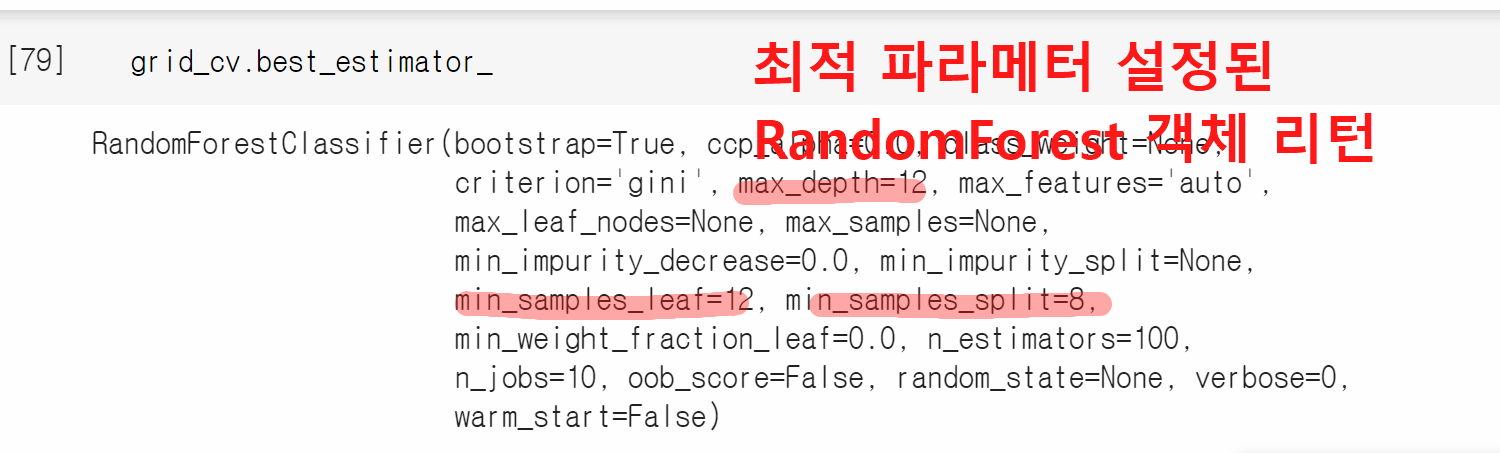

In [ ]:
# 최적의 분류기
# 최적의 파라미터로 설정해서 객체 생성
best_random_forest = grid_cv.best_estimator_
best_random_forest

# 예측값을 best_predict 변수에 저장
best_predict = best_random_forest.predict(X_test)

# 정확도
accuracy_score(y_test, best_predict)
print(accuracy_score(y_test, best_predict))

0.9216152019002375


# RandomForest 컬럼 중요도

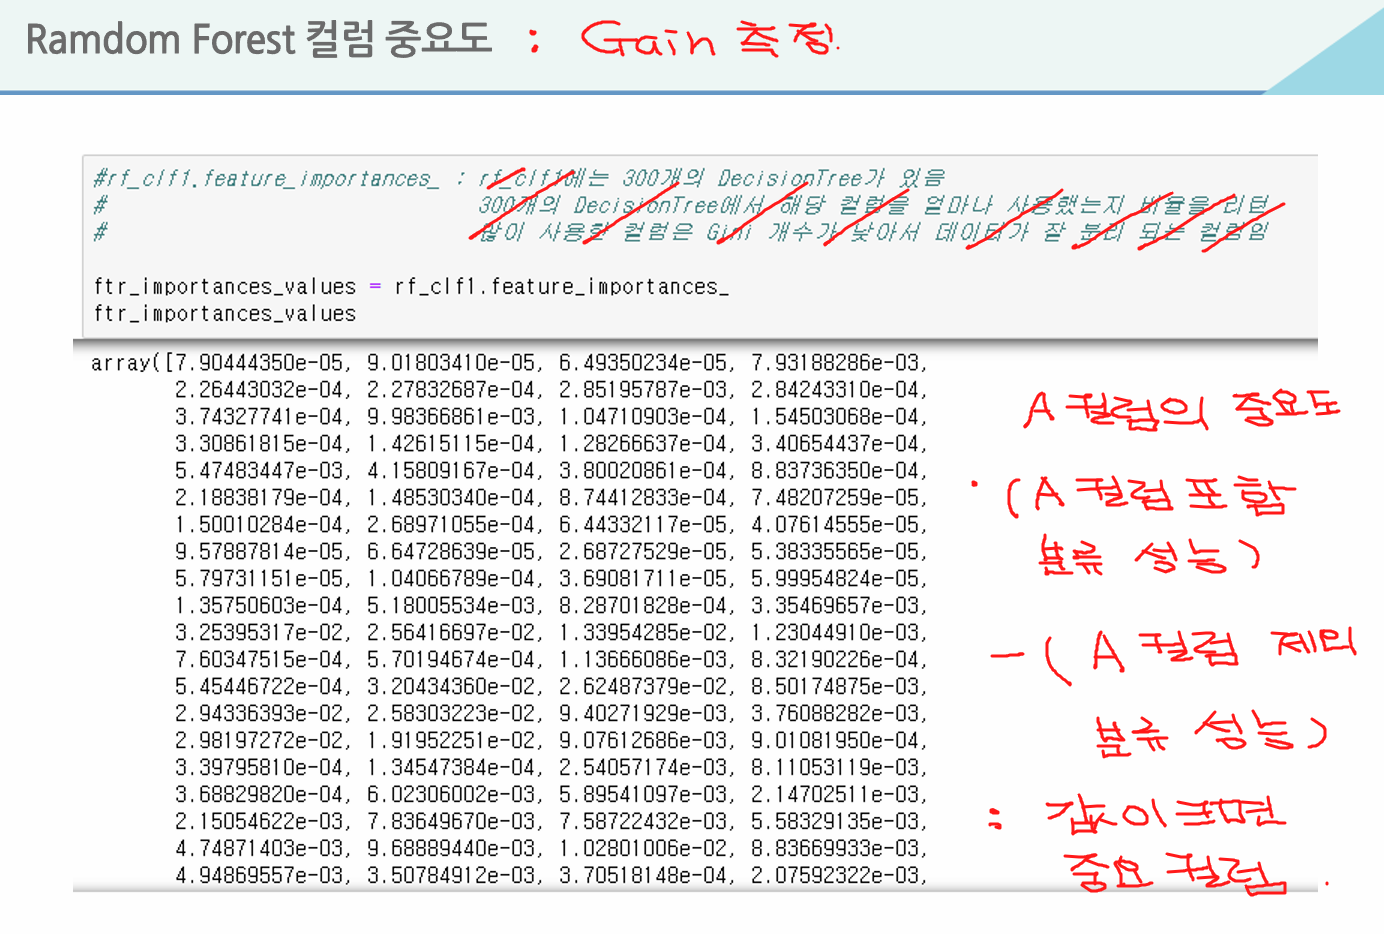

In [ ]:
# 각 컬럼의 중요도 확인하기
# feature_importances
ftr_importances_values = best_random_forest.feature_importances_

# 각 컬럼의 이름과 같이 확인하기 위해 시리즈 형태로 만들기
ftr_importances = pd.Series(ftr_importances_values, index = feature_name)
print(ftr_importances)
print("=" * 50)

# 중요한 순으로 보기 위해 내림차순
ftr_importances = ftr_importances.sort_values(ascending = False)

# 상위 20개
ftr_top20 = ftr_importances.head(20)
print(ftr_top20)

tBodyAcc-mean()-X                       0.000142
tBodyAcc-mean()-Y                       0.000106
tBodyAcc-mean()-Z                       0.000040
tBodyAcc-std()-X                        0.006434
tBodyAcc-std()-Y                        0.000174
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.000314
angle(tBodyGyroJerkMean,gravityMean)    0.000211
angle(X,gravityMean)                    0.022131
angle(Y,gravityMean)                    0.023076
angle(Z,gravityMean)                    0.011276
Length: 561, dtype: float64
tGravityAcc-min()-X                0.037688
tGravityAcc-energy()-X             0.031608
tGravityAcc-max()-Y                0.027630
tGravityAcc-mean()-Y               0.027267
tGravityAcc-mean()-X               0.027220
tGravityAcc-max()-X                0.026520
angle(Y,gravityMean)               0.023076
angle(X,gravityMean)               0.022131
tGravityAcc-energy()-Y             0.019167
tGravityAcc-min()-Y                0.

In [ ]:
plt.style.use("ggplot")
# 상위 20개 차트로 보기
plt.figure(figsize = (8,6))
plt.title("Feature Importance Top 20")

sns.barplot(
    x = ftr_top20,
    y = ftr_top20.index
            
            )

image.png

# 실습

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
features_path = ('/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/human_activity_features.txt')
X_train_path = ('/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/human_activity_X_train.txt')
X_test_path = ('/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/human_activity_X_test.txt')
y_train_path = ('/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/human_activity_y_train.txt')
y_test_path = ('/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/human_activity_y_test.txt')

# "\s+" 한개 이상의 공백으로 나뉘어져있음
# 첫번째줄(칸이름)이 없는경우 header = None
feature_name_df = pd.read_csv(
    features_path,
    sep="\s+",
    header = None,
    names = ["column_index", "column_name"]                     
 )

X_train = pd.read_csv(
    X_train_path,
    sep = "\s+",
    header=None,    
)

X_test = pd.read_csv(
    X_test_path,
    sep = "\s+",
    header = None                    
 )

y_train = pd.read_csv(
    y_train_path,
    sep = "\s+",
    header = None,
    names = ["action"]
                      )

y_test = pd.read_csv(
    y_test_path,
    sep = "\s+",
    header = None,
    names = ["action"]
    )

In [ ]:
feature_name =  feature_name_df.iloc[:, 1].values.tolist()

X_train.columns = feature_name
X_test.columns =  feature_name

X_train.describe()

tBodyAcc-mean()-X  ...  angle(Z,gravityMean)
count        7352.000000  ...           7352.000000
mean            0.274488  ...             -0.056515
std             0.070261  ...              0.279122
min            -1.000000  ...             -1.000000
25%             0.262975  ...             -0.143414
50%             0.277193  ...              0.003181
75%             0.288461  ...              0.107659
max             1.000000  ...              1.000000

[8 rows x 561 columns]

In [ ]:
# 1 걷기
# 2 계단 오르기
# 3 계단 내려가기
# 4 앉기
# 5 서있기
# 6 눕기

print(y_train['action'].value_counts())

# null값 합 조회
X_train.isnull().sum()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroMean,gravityMean)        0
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Length: 561, dtype: int64

In [ ]:
# 분류기 객체생성
rf_clf = RandomForestClassifier()

# 분류기 학습
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# 예측
pred = rf_clf.predict(X_test)

# 정확도
accuracy = accuracy_score(y_test, pred)
print("랜덤 포레스트 정확도 : {}".format(accuracy))

랜덤 포레스트 정확도 : 0.9243298269426535


In [ ]:
params = {
    "n_estimators":[100], # 트리 개수 100개
    "max_depth":[6, 8, 10, 12], # 최대 트리의 깊이 6, 8,10 ,12
     "min_samples_leaf":[8, 12, 18], # 최소 트리잎의 개수
    "min_samples_split":[8,16, 20] # 전체 데이터 로우 중에서 
                                  # 최소 몇개의 데이터를 이용해서 트리를 만들거냐
}

# 1번  -> 빈 분류기를 일단 하나 만들
rf_clf = RandomForestClassifier(n_jobs=10)
grid_cv = GridSearchCV(rf_clf,param_grid=params, n_jobs=10)

# 2번 -> GridSearchCv라는 함수로 이제 최적의 파라미터를 찾을 것임!
# 파라미터란??  어떠한  옵션에 대한 수치! 라고 생각하면 됌

# 그렇다면 최적의 파라미터를 왜 찾나??
# 우리가 빈 분류기에 학습시킬 X_train ,Y_train 양이 너무 많기 떄문

# 간단히 말하면 분류기 성능을 높이기 위해서
# 분류기에 X_train, Y_train 값을 주고 학습할때 '요렇게도 해보고 저렇게도 해보기 위해서'
# 요렇게도 해보고 저렇게도 해보는 것을 편리하게 하기위해 GridSerachCv를 사용!

# 따라서 아래 코드를 해석하자면
grid_cv = GridSearchCV(rf_clf,param_grid=params, n_jobs=10)

# 우리가 만들어논 빈 분류기  "rf_clf"에 학습을 할껀데  좋은 성능의 분류기를 찾기위해

# 학습할때
# param_grid = params    
# 위에 저렇게 우리가 설정한 수치들(파라미터)을 가지고 요렇게도 해보고 저렇게도 해본다.

#  n_jobs=10 :  양이 많으니 cpu 10개를 사용해서 놔눠서 돌려본다

In [ ]:
현준이 최고